Ниже приведен пример кода, который включает в себя генерацию сигнала (комплексной экспоненты с частотой 50 Гц) и шума. Количество выборок для моделирования становится длиной БПФ, поскольку мы берем БПФ всего моделируемого сигнала.

In [1]:
#Импортирование библиотек numpy и matplotlib.pyplot.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Устанавливается частота дискретизации Fs равная 300
Fs = 300 # sample rate
Ts = 1/Fs #Рассчитывается период дискретизации Ts как обратная величина частоты дискретизации.
N = 2048 # Задается количество сэмплов N, которые будут сгенерированы.

In [3]:
#Создается массив t, содержащий временные метки для каждого сэмпла, с использованием периода дискретизации и количества сэмплов.
t = Ts*np.arange(N)
x = np.exp(1j*2*np.pi*50*t) # Создается массив x, который моделирует синусоиду с частотой 50 Гц, используя угловую частоту и временные метки.

In [4]:
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # Генерируется массив n, содержащий комплексный шум с единичной мощностью, используя случайные значения в комплексном виде.
noise_power = 2
r = x + n * np.sqrt(noise_power) # сигнал, который представляет собой комбинацию сигнала x и шума n с учетом мощности шума

In [5]:
PSD = np.abs(np.fft.fft(r))**2 / (N*Fs) #Вычисляется спектральная плотность мощности (PSD) сигнала r с помощью преобразования Фурье.
PSD_log = 10.0*np.log10(PSD) #преобразование в дБ
PSD_shifted = np.fft.fftshift(PSD_log) #Выполняется сдвиг PSD_log с помощью функции fftshift 

In [6]:
#Создается массив f, содержащий частотные значения от -Fs/2 до Fs/2 с шагом Fs/N.
f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step

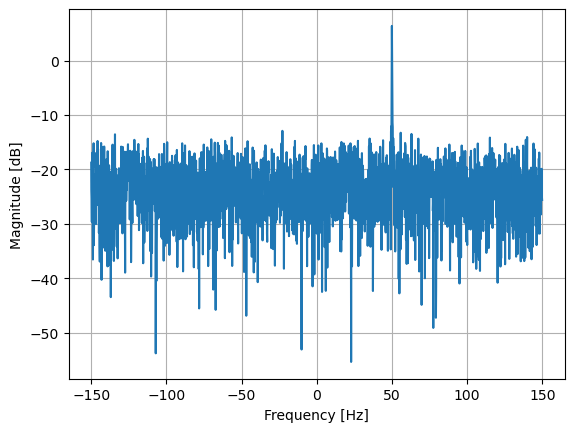

In [7]:
plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()

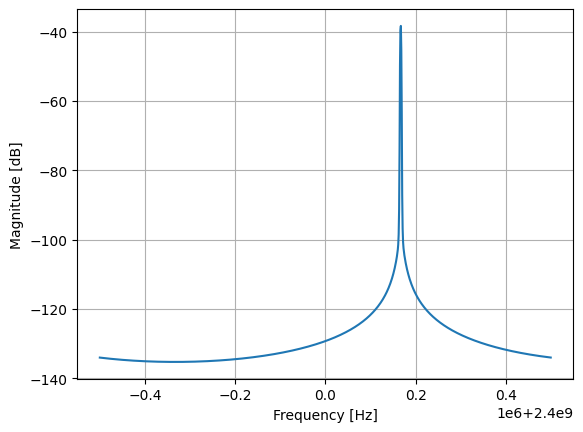

In [5]:
Fs = 1e6 # частота 1 Мгц
N = 1024
x = x[0:N] # используем первые 1024 выборки в качестве примера для создания БПФ 

#возводим полученную величину в квадрат, чтобы получить мощность, далее нормализируем делим на размер БПФ и частоту дискретизации 
PSD = np.abs(np.fft.fft(x))**2 / (N*Fs)
PSD_log = 10.0*np.log10(PSD) # преобразование в дБ
PSD_shifted = np.fft.fftshift(PSD_log) # Сдвигаем PSD, чтобы центральная частота была в центре графика

x = x * np.hamming(len(x)) # Применяем оконную функцию Хэмминга к образцам x
center_freq = 2.4e9 # Устанавливаем центральную частоту в 2.4 ГГц, на которую настроен наш SDR
f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) 
f += center_freq 
plt.plot(f, PSD_shifted)

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()